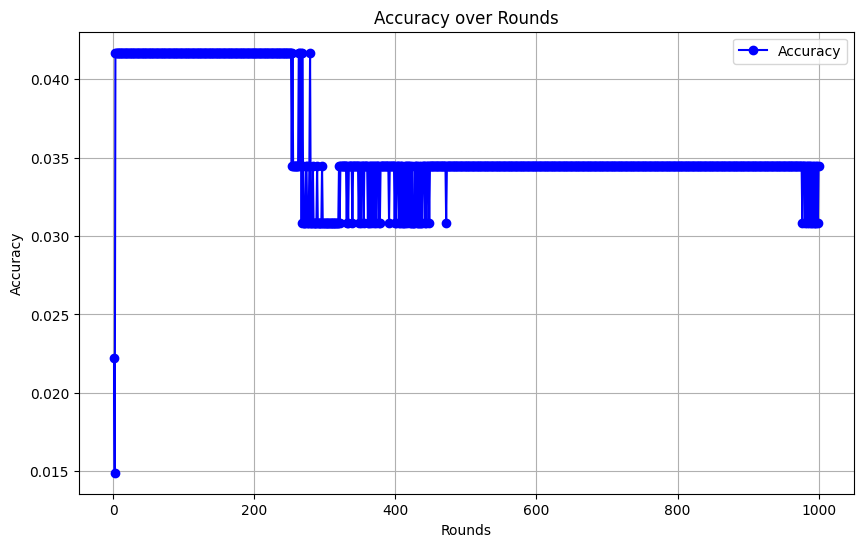

In [21]:
import ast  # To safely evaluate the string as a dictionary
import matplotlib.pyplot as plt

# File path to the accuracy data
file_path = "/home/houjason/project/flower/baselines/flwr_baselines/flwr_baselines/publications/leaf/femnist/plot/accuracy.txt"

# Step 1: Read the file and load the accuracy data
with open(file_path, 'r') as file:
    data = file.read()
    
# Step 2: Convert the string representation of the dictionary to an actual Python dictionary
accuracy_data = ast.literal_eval(data)

# Step 3: Extract rounds and accuracy values
rounds = [item[0] for item in accuracy_data['accuracy']]
accuracy = [item[1] for item in accuracy_data['accuracy']]

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy, marker='o', color='b', label='Accuracy')

# Step 5: Add titles and labels
plt.title('Accuracy over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


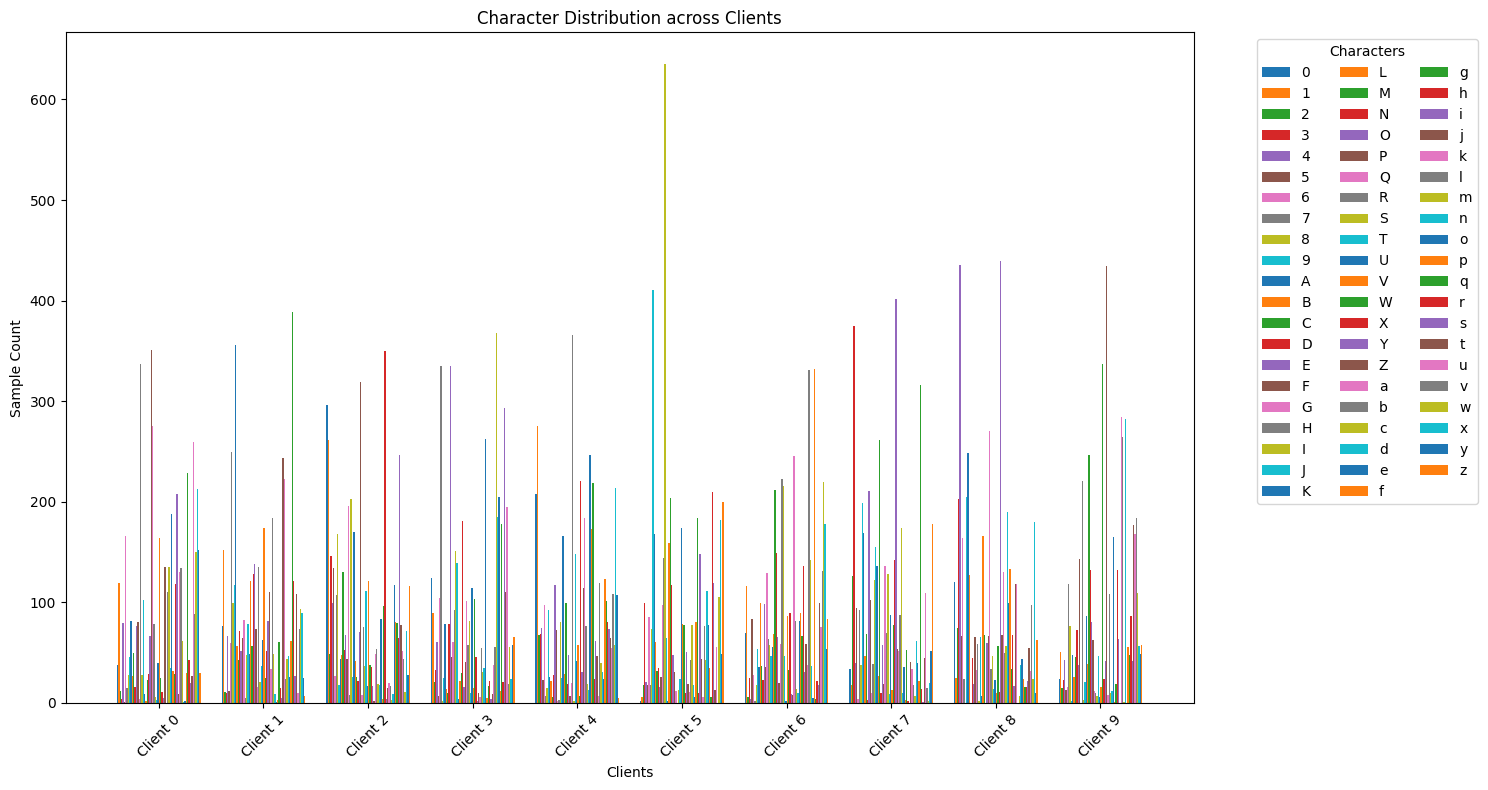

In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your data file
file_path = "./dirichlet_distribution_by_character.txt"

# Read data from the file
data = {}
with open(file_path, 'r') as f:
    for line in f:
        client, values = line.split(': ', 1)
        client = client.strip()
        values = json.loads(values.replace("'", "\""))
        data[client] = values

# Get all unique characters across all clients for consistency in the plot
all_characters = sorted(set(char for counts in data.values() for char in counts.keys()))

# Prepare the plot
clients = list(data.keys())
x = np.arange(len(clients))  # the label locations
width = 0.8 / len(all_characters)  # the width of the bars

# Create a figure
plt.figure(figsize=(15, 8))

# Plot each character as a separate set of bars
for idx, character in enumerate(all_characters):
    # Gather counts for each client for the given character
    counts = [data[client].get(character, 0) for client in clients]
    plt.bar(x + idx * width, counts, width=width, label=character)

# Set labels and title
plt.xlabel('Clients')
plt.ylabel('Sample Count')
plt.title('Character Distribution across Clients')
plt.xticks(x + width * (len(all_characters) - 1) / 2, clients, rotation=45)

# Adjust the legend to have 3 columns
plt.legend(title='Characters', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.tight_layout()

# Display the plot
plt.show()
